# Post-simulation processing

### Checking and centering the trajectory

In [2]:
!gmx check -f Nctrl/mdNctrl_center.xtc

                      :-) GROMACS - gmx check, 2025.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/nikka/GMX_via_biobb
Command line:
  gmx check -f Nctrl/mdNctrl_center.xtc

Checking file Nctrl/mdNctrl_center.xtc
Reading frame       0 time    0.000   
# Atoms  18274
Precision 0.001 (nm)
Last frame      20000 time 200000.000   


Item        #frames Timestep (ps)
Step         20001    10
Time         20001    10
Lambda           0
Coords       20001    10
Velocities       0
Forces           0
Box          20001    10

GROMACS reminds you: "The Poodle Bites" (F. Zappa)



In [ ]:
#Center the trajectory
import subprocess

input_tpr = 'PDL1/r2/mdR2_200ns.tpr'
input_traj = 'PDL1/r2/mdR2_100ns.xtc'
output_traj = 'PDL1/r1/mdr2_center.xvg'

commands = """
1
0
"""  # customize for your selections

proc = subprocess.run(
    ['gmx', 'trjconv', '-s', input_tpr, '-f', input_traj, '-o', output_xvg, '-center', '-pbc', 'mol', '-ur', 'compact'],
    input=commands.encode(),
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

print(proc.stdout.decode())
print(proc.stderr.decode())


### Generating RMSD, RMSF, Rg, H-bonds, SASA, PE

In [3]:
# Create Index for the binding site
# Check mmpbsa log for the residues

import subprocess

input_gro = 'Nctrl/mdNctrl_100ns.gro'
output_ndex = 'Nctrl/bind_res.ndx'

commands = """
r 56 57 58 59 60 61 62 63 111 112 113 115 123 125 126
q
"""  # customize for your selections

proc = subprocess.run(
    ['gmx', 'make_ndx', '-f', input_gro, '-o', output_ndex],
    input=commands.encode(),
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

print(proc.stdout.decode())
print(proc.stderr.decode())


Going to read 0 old index file(s)
Analysing residue names:
There are:   115    Protein residues
There are:     1      Other residues
There are:  5446      Water residues
There are:    35        Ion residues
Analysing Protein...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...

  0 System              : 18274 atoms
  1 Protein             :  1852 atoms
  2 Protein-H           :   922 atoms
  3 C-alpha             :   115 atoms
  4 Backbone            :   345 atoms
  5 MainChain           :   461 atoms
  6 MainChain+Cb        :   570 atoms
  7 MainChain+H         :   576 atoms
  8 SideChain           :  1276 atoms
  9 SideChain-H         :   461 atoms
 10 Prot-Masses         :  1852 atoms
 11 non-Protein         : 16422 atoms
 12 Other               :    49 atoms
 13 UNL                 :    49 atoms
 14 NA                  :    18 atoms
 15 CL                  :    17 atoms
 16 Water               : 16338 atoms
 17 SOL                 : 16338 atoms

#### Calculate distance of ligand from binding site (center of mass)

In [4]:
!gmx distance -s Nctrl/mdNctrl_200ns.tpr -f Nctrl/mdNctrl_center.xtc -n Nctrl/bind_res.ndx -select 'com of group "Other" plus com of group "binding_site"' -oall Nctrl/ligand_bind_dist.xvg

                     :-) GROMACS - gmx distance, 2025.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/nikka/GMX_via_biobb
Command line:
  gmx distance -s Nctrl/mdNctrl_200ns.tpr -f Nctrl/mdNctrl_center.xtc -n Nctrl/bind_res.ndx -select 'com of group "Other" plus com of group "binding_site"' -oall Nctrl/ligand_bind_dist.xvg

Reading file Nctrl/mdNctrl_200ns.tpr, VERSION 2025.3 (single precision)
Reading file Nctrl/mdNctrl_200ns.tpr, VERSION 2025.3 (single precision)
Last frame      20000 time 200000.000   
Analyzed 20001 frames, last time 200000.000
com of group "Other" plus com of group "binding_site":
  Number of samples:  20001
  Average distance:   0.84461  nm
  Standard deviation: 0.08764  nm

GROMACS reminds you: "What if you're wrong about the great Ju Ju at the bottom of the sea?" (Richard Dawkins)



PNG image saved as nctrl_ligDist.png


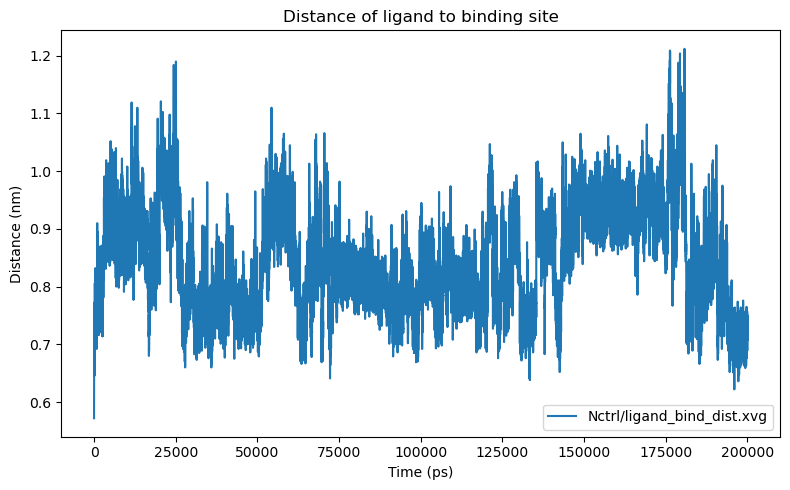

In [5]:
%run plot_xvg.py  -f Nctrl/ligand_bind_dist.xvg -t 'Distance of ligand to binding site' -s nctrl_ligDist.png

In [8]:
import subprocess

input_tpr = 'Nctrl/mdNctrl_200ns.tpr'
input_traj = 'Nctrl/mdNctrl_center.xtc'
input_ndex = 'Nctrl/bind_res.ndx'
output_xvg = 'Nctrl/Nctrl_rmsf_bind.xvg'

commands = """
21
"""  # customize for your selections

proc = subprocess.run(
    ['gmx', 'rmsf', '-s', input_tpr, '-f', input_traj, '-n', input_ndex, '-o', output_xvg],
    input=commands.encode(),
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

print(proc.stdout.decode())
print(proc.stderr.decode())


Selected 21: 'binding_site'

                       :-) GROMACS - gmx rmsf, 2025.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/nikka/GMX_via_biobb
Command line:
  gmx rmsf -s Nctrl/mdNctrl_200ns.tpr -f Nctrl/mdNctrl_center.xtc -n Nctrl/bind_res.ndx -o Nctrl/Nctrl_rmsf_bind.xvg

Reading file Nctrl/mdNctrl_200ns.tpr, VERSION 2025.3 (single precision)
Reading file Nctrl/mdNctrl_200ns.tpr, VERSION 2025.3 (single precision)
Select group(s) for root mean square calculation
Group     0 (         System) has 18274 elements
Group     1 (        Protein) has  1852 elements
Group     2 (      Protein-H) has   922 elements
Group     3 (        C-alpha) has   115 elements
Group     4 (       Backbone) has   345 elements
Group     5 (      MainChain) has   461 elements
Group     6 (   MainChain+Cb) has   570 elements
Group     7 (    MainChain+H) has   576 elements
Group     8 (      SideChain) has  1276 elements
Group     9 (    SideChain-H) ha

PNG image saved as Nctrl_rmsfBind.png


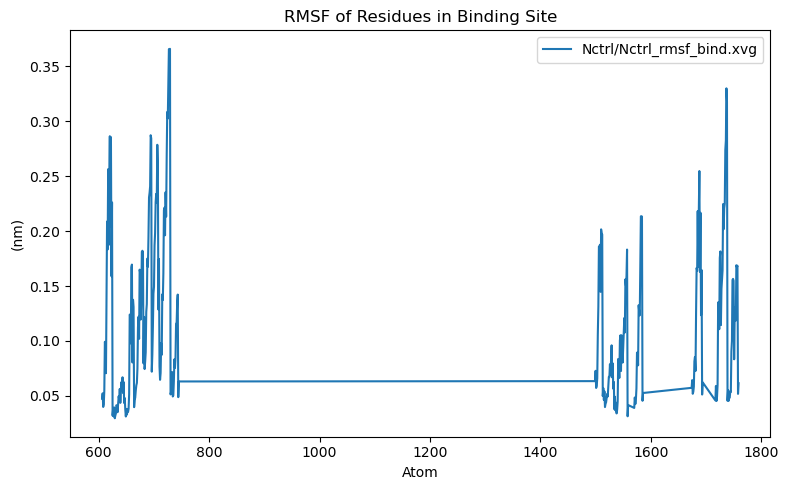

In [9]:
%run plot_xvg.py  -f Nctrl/Nctrl_rmsf_bind.xvg -t 'RMSF of Residues in Binding Site' -s Nctrl_rmsfBind.png

#### RMSD, RMSF. Radius of gyration, potential energy

In [10]:
import subprocess

input_tpr = 'Nctrl/mdNctrl_200ns.tpr'
input_traj = 'Nctrl/mdNctrl_center.xtc'
output_xvg = 'PDL1/xvg/Nctrl_rmsd.xvg'

commands = """
4
4
"""  # customize for your selections

proc = subprocess.run(
    ['gmx', 'rms', '-s', input_tpr, '-f', input_traj, '-o', output_xvg],
    input=commands.encode(),
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

print(proc.stdout.decode())
print(proc.stderr.decode())


Selected 4: 'Backbone'
Selected 4: 'Backbone'

                       :-) GROMACS - gmx rms, 2025.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/nikka/GMX_via_biobb
Command line:
  gmx rms -s Nctrl/mdNctrl_200ns.tpr -f Nctrl/mdNctrl_center.xtc -o PDL1/xvg/Nctrl_rmsd.xvg

Reading file Nctrl/mdNctrl_200ns.tpr, VERSION 2025.3 (single precision)
Reading file Nctrl/mdNctrl_200ns.tpr, VERSION 2025.3 (single precision)
Select group for least squares fit
Group     0 (         System) has 18274 elements
Group     1 (        Protein) has  1852 elements
Group     2 (      Protein-H) has   922 elements
Group     3 (        C-alpha) has   115 elements
Group     4 (       Backbone) has   345 elements
Group     5 (      MainChain) has   461 elements
Group     6 (   MainChain+Cb) has   570 elements
Group     7 (    MainChain+H) has   576 elements
Group     8 (      SideChain) has  1276 elements
Group     9 (    SideChain-H) has   461 elements
Group

PNG image saved as r2_rmsdBack.png


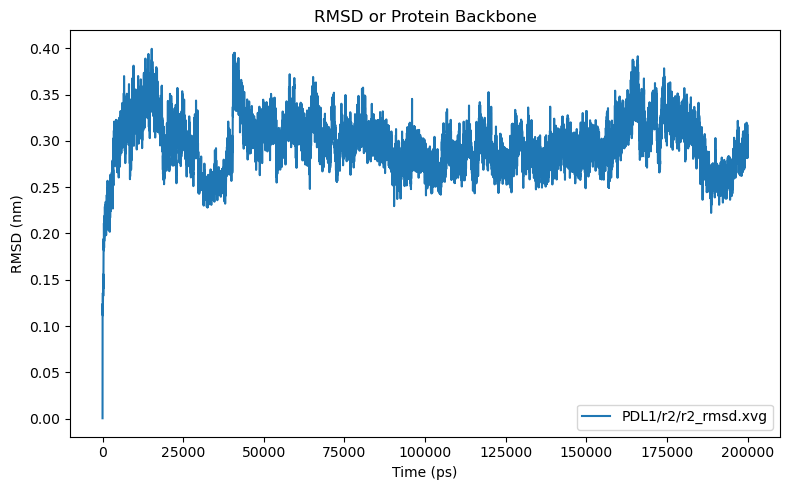

In [6]:
%run plot_xvg.py  -f PDL1/r2/r2_rmsd.xvg -t 'RMSD or Protein Backbone' -s r2_rmsdBack.png

In [11]:
# Create Index for the binding site
# Check mmpbsa log for the residues

import subprocess

input_tpr = 'Nctrl/mdNctrl_200ns.tpr'
input_traj = 'Nctrl/mdNctrl_center.xtc'
output_xvg = 'PDL1/xvg/Nctrl_rmsf.xvg'

commands = """
4
"""  # customize for your selections

proc = subprocess.run(
    ['gmx', 'rmsf', '-s', input_tpr, '-f', input_traj, '-o', output_xvg],
    input=commands.encode(),
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

print(proc.stdout.decode())
print(proc.stderr.decode())


Selected 4: 'Backbone'

                       :-) GROMACS - gmx rmsf, 2025.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/nikka/GMX_via_biobb
Command line:
  gmx rmsf -s Nctrl/mdNctrl_200ns.tpr -f Nctrl/mdNctrl_center.xtc -o PDL1/xvg/Nctrl_rmsf.xvg

Reading file Nctrl/mdNctrl_200ns.tpr, VERSION 2025.3 (single precision)
Reading file Nctrl/mdNctrl_200ns.tpr, VERSION 2025.3 (single precision)
Select group(s) for root mean square calculation
Group     0 (         System) has 18274 elements
Group     1 (        Protein) has  1852 elements
Group     2 (      Protein-H) has   922 elements
Group     3 (        C-alpha) has   115 elements
Group     4 (       Backbone) has   345 elements
Group     5 (      MainChain) has   461 elements
Group     6 (   MainChain+Cb) has   570 elements
Group     7 (    MainChain+H) has   576 elements
Group     8 (      SideChain) has  1276 elements
Group     9 (    SideChain-H) has   461 elements
Group    10 

PNG image saved as r2_rmsfBack.png


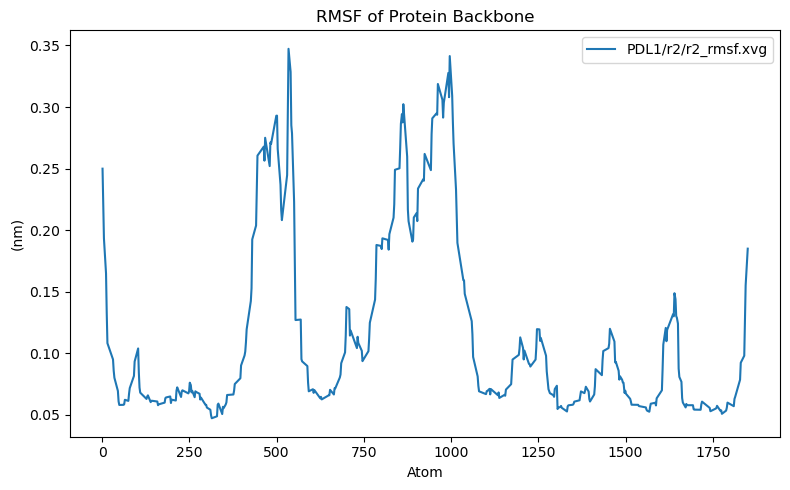

In [8]:
%run plot_xvg.py  -f PDL1/r2/r2_rmsf.xvg -t 'RMSF of Protein Backbone' -s r2_rmsfBack.png

In [12]:
import subprocess

input_tpr = 'Nctrl/mdNctrl_200ns.tpr'
input_traj = 'Nctrl/mdNctrl_center.xtc'
output_xvg = 'PDL1/xvg/Nctrl_gyrate.xvg'

commands = """
4
"""  # customize for your selections

proc = subprocess.run(
    ['gmx', 'gyrate', '-s', input_tpr, '-f', input_traj, '-o', output_xvg],
    input=commands.encode(),
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

print(proc.stdout.decode())
print(proc.stderr.decode())



                      :-) GROMACS - gmx gyrate, 2025.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/nikka/GMX_via_biobb
Command line:
  gmx gyrate -s Nctrl/mdNctrl_200ns.tpr -f Nctrl/mdNctrl_center.xtc -o PDL1/xvg/Nctrl_gyrate.xvg

Reading file Nctrl/mdNctrl_200ns.tpr, VERSION 2025.3 (single precision)
Reading file Nctrl/mdNctrl_200ns.tpr, VERSION 2025.3 (single precision)
Last frame      20000 time 200000.000   
Analyzed 20001 frames, last time 200000.000

GROMACS reminds you: "Load Up Your Rubber Bullets" (10 CC)




PNG image saved as r2_gyrate.png


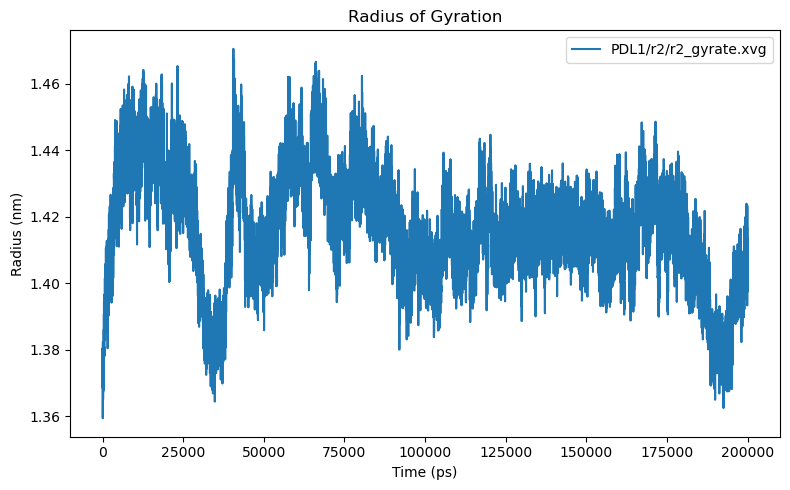

In [10]:
%run plot_xvg.py  -f PDL1/r2/r2_gyrate.xvg -t 'Radius of Gyration' -s r2_gyrate.png

In [13]:
import subprocess

input_edr = 'Nctrl/mdNctrl_100ns.edr'
output_xvg = 'PDL1/xvg/Nctrl_pot.xvg'

commands = "11\n\n"  # Select 'Potential', then <enter> to end selection

proc = subprocess.run(
    ['gmx', 'energy', '-f', input_edr, '-o', output_xvg],
    input=commands.encode(),
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

print(proc.stdout.decode())
print(proc.stderr.decode())



Statistics over 100000001 steps [ 0.0000 through 200000.0000 ps ], 1 data sets
All statistics are over 1000001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                   -283272         11      625.5   -17.4209  (kJ/mol)

                      :-) GROMACS - gmx energy, 2025.3 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /home/nikka/GMX_via_biobb
Command line:
  gmx energy -f Nctrl/mdNctrl_100ns.edr -o PDL1/xvg/Nctrl_pot.xvg

Opened Nctrl/mdNctrl_100ns.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14    

PNG image saved as r2_pot.png


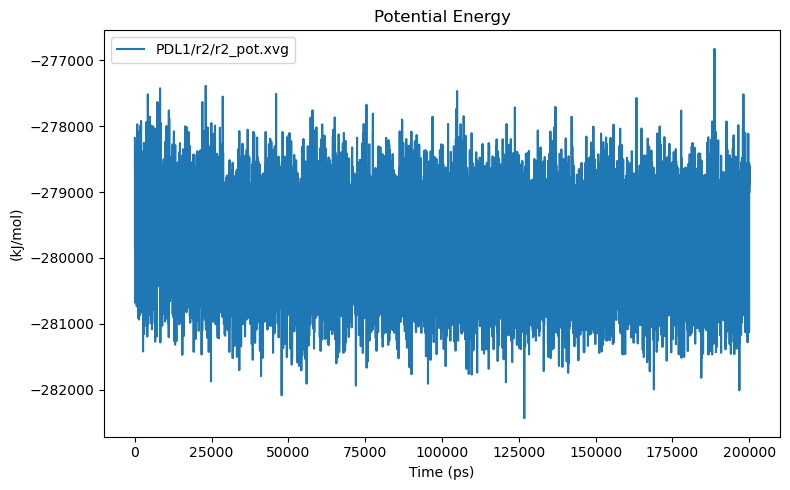

In [13]:
%run plot_xvg.py  -f PDL1/r2/r2_pot.xvg -t 'Potential Energy' -s r2_pot.png

In [ ]:
# Create Index for the binding site
# Check mmpbsa log for the residues

import subprocess

input_tpr = 'PDL1/r0/md_200ns.tpr'
input_traj = 'PDL1/r0/PDL1_center.xtc'
input_ndx = 'PDL1/r0/bind_res.ndx'
output_xvg = 'PDL1/r0/r0_hbond_res.xvg'

commands = """
13
21
"""  # customize for your selections

proc = subprocess.run(
    ['gmx', 'hbond', '-s', input_tpr, '-f', input_traj, '-n', input_ndx, '-num', output_xvg],
    input=commands.encode(),
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

print(proc.stdout.decode())
print(proc.stderr.decode())

In [22]:
%run plot_xvg.py  -f PDL1/r0/hbnum.xvg -t 'Hydrogen bonds with Ligand' -s hnum.png

FileNotFoundError: [Errno 2] No such file or directory: 'PDL1/r0/hbnum.xvg'

## Statistical Analyses

In [14]:
%run xvg2csv_batch.py PDL1/xvg/new

Converted PDL1/xvg/new/Nctrl_pot.xvg to PDL1/xvg/new/Nctrl_pot.csv with 2 columns and 7 digits.
Converted PDL1/xvg/new/Nctrl_rmsd.xvg to PDL1/xvg/new/Nctrl_rmsd.csv with 2 columns and 7 digits.
Converted PDL1/xvg/new/Nctrl_gyrate.xvg to PDL1/xvg/new/Nctrl_gyrate.csv with 5 columns and 7 digits.
Converted PDL1/xvg/new/Nctrl_rmsf.xvg to PDL1/xvg/new/Nctrl_rmsf.csv with 2 columns and 7 digits.


In [29]:
%run xvg2csv.py PDL1/r2/r2_rmsf_bind.xvg --csv PDL1/xvg/r2_rmsf_bind.csv

Converted PDL1/r2/r2_rmsf_bind.xvg to PDL1/xvg/r2_rmsf_bind.csv with 2 columns and 7 digits.
